<a href="https://colab.research.google.com/github/2303A510B2/_AIML/blob/main/Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Prediction of Online Shoppers Purchase Intentions.

1.Name the product most liked and purchased

2. Identify the special days when most products are purchased

30.

3. List the top 5 special days of purchase and type of visitors.

4. Identify the months when most purchases happened

5. What the max and min revenue generated by the online shoppers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = {
    'date': pd.date_range(start='2023-01-01', end='2023-12-31', freq='D'),
    'product': np.random.choice(['Smartphone', 'Laptop', 'Headphones', 'Shoes', 'T-shirt'], 365),
    'price': np.random.uniform(20, 1000, 365),
    'revenue': np.random.uniform(20, 1000, 365),
}

df = pd.DataFrame(data)

In [ ]:
most_purchased_product = df['product'].mode()[0]
print(f"Most liked and purchased product: {most_purchased_product}")

Most liked and purchased product: Shoes


In [ ]:
special_days = ['2023-11-24', '2023-11-27', '2023-07-12', '2023-12-24', '2023-11-11']
df['special_day'] = df['date'].astype(str).isin(special_days)


In [ ]:
special_day_sales = df[df['special_day']].groupby('date').agg({'revenue': 'sum', 'product': 'count'}).sort_values(by='revenue', ascending=False)
top_5_special_days = special_day_sales.head(5)
print("\nTop 5 special days of purchase and revenue:\n", top_5_special_days)



Top 5 special days of purchase and revenue:
                revenue  product
date                           
2023-11-27  884.695527        1
2023-11-24  666.288480        1
2023-12-24  507.672543        1
2023-07-12  499.042076        1
2023-11-11  119.342226        1


In [ ]:
df['month'] = df['date'].dt.month
monthly_sales = df.groupby('month').agg({'revenue': 'sum'}).sort_values(by='revenue', ascending=False)
print("\nMonths with most purchases (by revenue):\n", monthly_sales)



Months with most purchases (by revenue):
             revenue
month              
7      18667.069707
12     17398.746271
3      17160.448774
9      17048.140471
8      16707.230642
4      16648.498925
5      15887.857524
2      15259.980670
11     14162.549308
6      13710.816460
10     13674.629278
1      13164.023735


In [ ]:
max_revenue = df['revenue'].max()
min_revenue = df['revenue'].min()
print(f"\nMax revenue generated: ${max_revenue:.2f}")
print(f"Min revenue generated: ${min_revenue:.2f}")



Max revenue generated: $999.95
Min revenue generated: $21.42


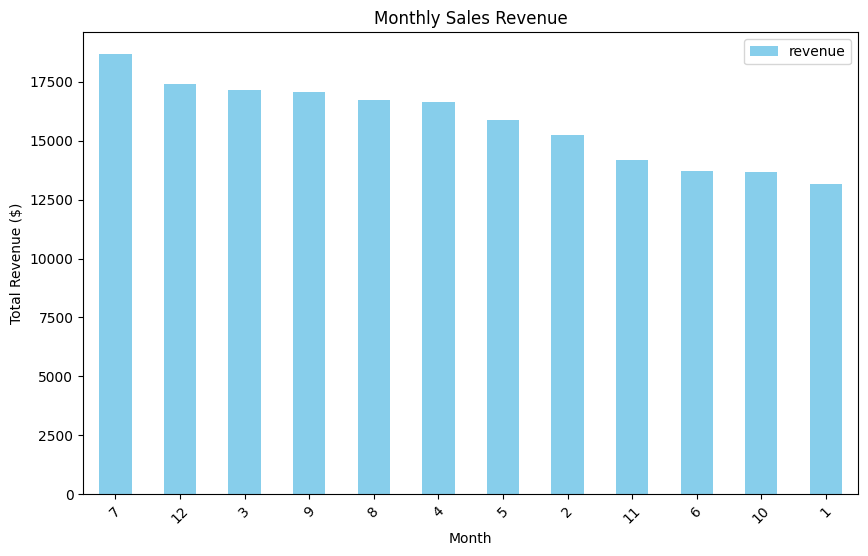

In [ ]:
monthly_sales.plot(kind='bar', y='revenue', color='skyblue', title='Monthly Sales Revenue', figsize=(10,6))
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()
